In [1]:
import pandas as pd
import numpy as np

opendt = pd.read_parquet("../data/footprinter.parquet")
metric_1 = "cpu_utilization"
metric_2 = "carbon_intensity"
opendt

,timestamp,timestamp_absolute,host_id,host_name,core_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,...,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,carbon_intensity,carbon_emission,uptime,downtime,boot_time,boot_time_absolute
0,30000,1665093630000,3eb5d772-5f2d-a7e7-0000-00000000010e,A01,16,128000000,0,0,0,0,...,0,0,32.0,960.0,152.480506,0.040661,30000,0,1665093600000,NaN
1,30000,1665093630000,815f08b6-005e-b55f-0000-0000000000ec,A01,16,128000000,0,0,0,0,...,0,0,32.0,960.0,152.480506,0.040661,30000,0,1665093600000,NaN
2,30000,1665093630000,34c728aa-0584-7924-0000-0000000000c8,A01,16,128000000,0,0,0,0,...,0,0,32.0,960.0,152.480506,0.040661,30000,0,1665093600000,NaN
3,30000,1665093630000,bdb9ee86-519b-4e29-0000-000000000085,A01,16,128000000,0,0,0,0,...,0,0,32.0,960.0,152.480506,0.040661,30000,0,1665093600000,NaN
4,30000,1665093630000,58352289-bb0e-d97f-0000-0000000000c5,A01,16,128000000,0,0,0,0,...,0,0,32.0,960.0,152.480506,0.040661,30000,0,1665093600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587085,605070000,1665698670000,d15dcc46-f84f-5c2a-0000-000000000084,A01,16,128000000,0,0,0,0,...,0,0,32.0,0.0,199.220248,0.000000,0,0,1665093600000,NaN
5587086,605070000,1665698670000,eb9d836a-3647-6587-0000-0000000000ca,A01,16,128000000,0,0,0,0,...,0,0,32.0,0.0,199.220248,0.000000,0,0,1665093600000,NaN
5587087,605070000,1665698670000,a32dc9f6-4f1d-f03a-0000-000000000002,A01,16,128000000,0,0,0,0,...,0,0,32.0,0.0,199.220248,0.000000,0,0,1665093600000,NaN
5587088,605070000,1665698670000,44f70e6f-8f07-eca7-0000-0000000000c6,A01,16,128000000,0,0,0,0,...,0,0,32.0,0.0,199.220248,0.000000,0,0,1665093600000,NaN


In [2]:
# opendt_cpu_utilization = opendt["cpu_utilization"].groupby("timestamp").mean()
opendt_cpu = opendt.groupby("timestamp")["cpu_utilization"].mean()
opendt_cpu

timestamp
30000        0.232371
60000        0.214303
90000        0.214930
120000       0.215652
150000       0.217455
               ...   
604950000    0.052793
604980000    0.046264
605010000    0.035140
605040000    0.028653
605070000    0.008593
Name: cpu_utilization, Length: 20169, dtype: float64

In [3]:
opendt_latency = opendt.groupby("timestamp")[metric_2].sum()
opendt_latency

timestamp
30000         42237.100185
60000         42237.100185
90000         42237.100185
120000        42237.100185
150000        42237.100185
                 ...      
604950000     55184.008774
604980000     55184.008774
605010000     55184.008774
605040000     55184.008774
605070000    110368.017547
Name: carbon_intensity, Length: 20169, dtype: float64

/var/folders/zp/wbw59jc53p912jytp6zlm1wr0000gs/T/ipykernel_21151/885497119.py:26: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timestamps = pd.date_range(start=start_time, periods=len(opendt_cpu), freq="30S")


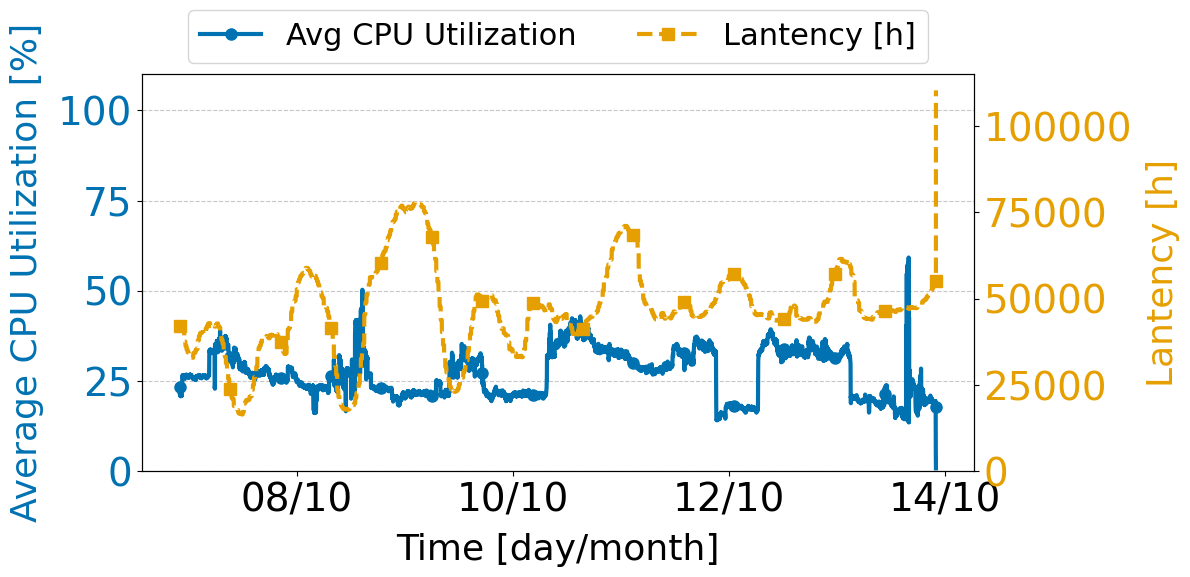

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# --- STYLE CONFIGURATION ---
COLOR_PALETTE = [
    "#0072B2", # Blue (for CPU)
    "#E69F00", # Orange (for Latency)
]

# 1. Load Data (Using your snippet)
# Note: Variable is 'opendt', but loading 'footprinter' file as per your code
opendt = pd.read_parquet("../data/footprinter.parquet")

# 2. Process Data
# Calculate Mean CPU and Sum Latency per timestamp
opendt_cpu = opendt.groupby("timestamp")[metric_1].mean()
opendt_latency = opendt.groupby("timestamp")[metric_2].sum()

# --- Time Alignment ---
# Footprinter data is every 30 seconds.
# We create a date range starting from 2022-10-06 22:00:00 to match previous plots.
start_time = pd.Timestamp("2022-10-06 22:00:00")
timestamps = pd.date_range(start=start_time, periods=len(opendt_cpu), freq="30S")

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- LEFT AXIS (CPU) ---
color_cpu = COLOR_PALETTE[0]
ax1.set_xlabel("Time [day/month]", fontsize=26, labelpad=10)
ax1.set_ylabel("Average CPU Utilization [%]", color=color_cpu, fontsize=26, labelpad=10)

# Plot CPU: Solid Blue Line with circle markers (using markevery to avoid clutter)
# 'markevery=len(x)//20' ensures we only see a few markers, like the reference style
line1 = ax1.plot(timestamps, opendt_cpu.values * 100,
                 color=color_cpu, linewidth=3, linestyle="-",
                 marker="o", markersize=8, markevery=len(timestamps)//15,
                 label="Avg CPU Utilization")

ax1.tick_params(axis='y', labelcolor=color_cpu, labelsize=28)
ax1.tick_params(axis='x', labelsize=28)
ax1.set_ylim(0, 110) # CPU % usually 0-100

# --- RIGHT AXIS (LATENCYY) ---
ax2 = ax1.twinx() # Create a second y-axis sharing the same x-axis
color_latency = COLOR_PALETTE[1]
ax2.set_ylabel("Lantency [h]", color=color_latency, fontsize=26, labelpad=10)

# Plot Latency: Dashed Orange Line with square markers
line2 = ax2.plot(timestamps, opendt_latency.values,
                 color=color_latency, linewidth=3, linestyle="--",
                 marker="s", markersize=8, markevery=len(timestamps)//15,
                 label="Lantency [h]")

ax2.tick_params(axis='y', labelcolor=color_latency, labelsize=28)
ax2.set_ylim(bottom=0) # Ensure Latency axis starts at 0

# --- FORMATTING ---
# X-Axis Date Format (Day/Month)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # Tick every 2 days

# Legend (Combine lines from both axes)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper center", fontsize=22, ncol=2, bbox_to_anchor=(0.5, 1.20))

# Grid (Horizontal dashed lines)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save as PDF
plt.savefig("exp_1_power_draw.pdf", format="pdf", bbox_inches="tight")
plt.show()